In [1]:
#10/26/20

library(here)
library(Matrix)
library(tidyverse)
library(Seurat)
library(scico)
library(scales)
library(reticulate)
library(repr)
library(future)
options(future.globals.maxSize = 100000 * 1024^2)

proto_genes=read.csv("../data/bulk_data/protoplasting.csv")
proto_list=as.character(proto_genes[abs(proto_genes$logFC) > 4,]$genes)
kwak_ptpms=read.csv("../data/counts/kwak_ptpms.csv")
rownames(kwak_ptpms) = kwak_ptpms$X
kwak_ptpms[,c(1,2,3)] =NULL
colnames(kwak_ptpms) = "counts"

here() starts at /home/robotmessenger810/sc_analysis/code

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::expand() masks Matrix::expand()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ tidyr::pack()   masks Matrix::pack()
✖ tidyr::unpack() masks Matrix::unpack()


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




In [2]:
all_intd_sct = readRDS("../data/intd_seu_objects/intd_normalized_etc_11_12_20_30pcs.rds")

In [3]:
DefaultAssay(all_intd_sct) <- "integrated"
options(repr.plot.width=12, repr.plot.height=12)
# Run the standard workflow for visualization and clustering
#all_intd_sct <- ScaleData(all_intd_sct, verbose = FALSE)
all_intd_sct <- RunPCA(all_intd_sct, npcs = 30, verbose = FALSE, approx = FALSE)
#From RunPCA doc: Features to compute PCA on. If features=NULL, PCA will be run using the variable features for the Assay. 
#Note that the features must be present in the scaled data. Any requested features that are not scaled or have 0 variance 
#will be dropped, and the PCA will be run using the remaining features.

all_intd_sct <- FindNeighbors(all_intd_sct, dims = 1:30)
all_intd_sct <- FindClusters(all_intd_sct, resolution = 0.7)
all_intd_sct <- RunUMAP(all_intd_sct, reduction = "pca", dims = 1:30)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 33112
Number of edges: 1050831

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9001
Number of communities: 25
Elapsed time: 6 seconds


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
21:31:25 UMAP embedding parameters a = 0.9922 b = 1.112

21:31:25 Read 33112 rows and found 30 numeric columns

21:31:25 Using Annoy for neighbor search, n_neighbors = 30

21:31:25 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*

|

21:31:32 Writing NN index file to temp file /tmp/RtmpnJldhi/file10fb640fab03

21:31:32 Searching Annoy index using 1 thread, search_k = 3000

21:31:47 Annoy recall = 100%

21:31:47 Commencing smooth kNN distance calibration using 1 thread

21:31:49 Initializing f

Warning message:
“Using `as.character()` on a quosure is deprecated as of rlang 0.3.0.
Please use `as_label()` or `as_name()` instead.
This warning is displayed once per session.”


    
     MUT_1 MUT_2 WT_1 WT_2
  0   1245   594  542  629
  1    647   554  729  625
  2    558   527  668  680
  3    962   453  434  441
  4    528   436  576  646
  5    629   359  548  329
  6    603   489  311  431
  7    615   439  358  367
  8    572   489  314  403
  9    520   357  382  336
  10   454   430  323  332
  11   360   501  221  440
  12   464   202  303  230
  13   391   273  186  253
  14   233   119  396  223
  15   299   111  303  201
  16   245   154  202  166
  17   315   165  108  143
  18   189   171  124  185
  19   182   149  148  177
  20   189   111  101  114
  21   141    54  133   89
  22    31   101   81  123
  23   130    73   64   66
  24    68    13   17   17

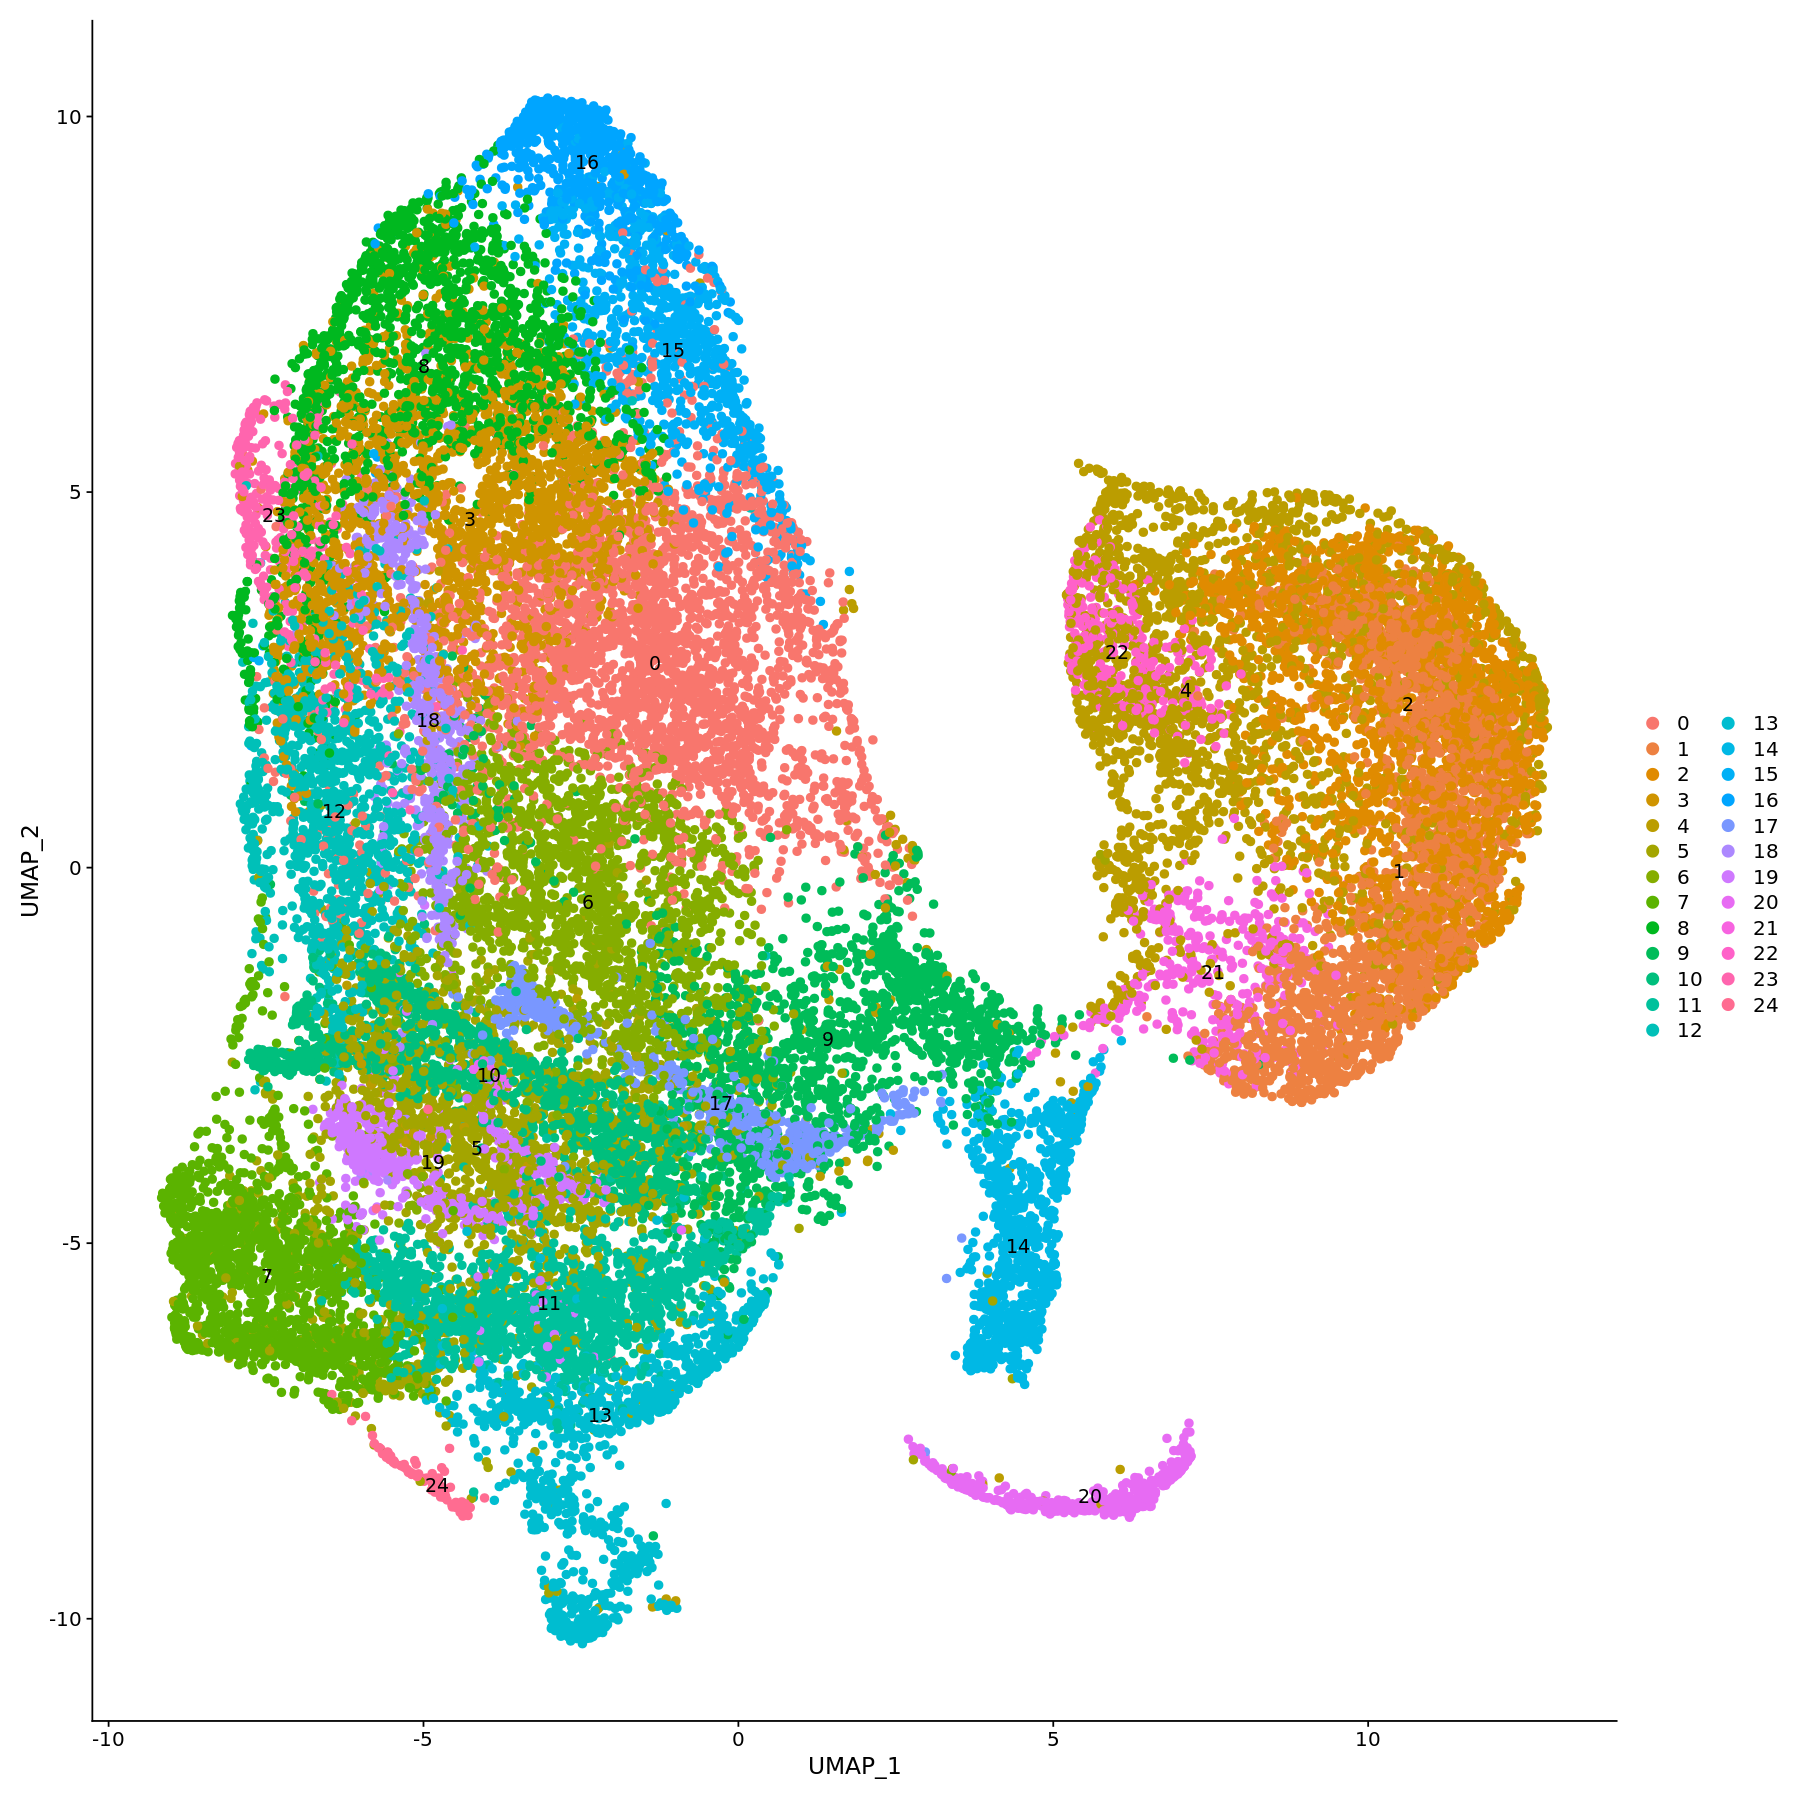

In [4]:
options(repr.plot.width=15, repr.plot.height=15)
DimPlot(all_intd_sct, reduction = "umap", label = TRUE , pt.size = 2)
table(Idents(all_intd_sct), all_intd_sct$orig.ident)

In [5]:
DefaultAssay(all_intd_sct) <- "RNA"
all_intd_sct = NormalizeData(all_intd_sct, verbose = FALSE)

In [6]:
#Find markers on WT abscission zone cells
WT_cells_only = subset(all_intd_sct, subset = orig.geno == "WT")

In [7]:
DefaultAssay(WT_cells_only) <- "RNA"
AZ.markers_WT_only=FindMarkers(all_intd_sct, ident.1 = 14)

In [14]:
DefaultAssay(all_intd_sct) <- "RNA"
AZ.marker_conserved=FindConservedMarkers(all_intd_sct, ident.1 = 14, grouping.var="orig.geno")

Testing group WT: (14) vs (4, 2, 5, 0, 18, 1, 3, 10, 7, 9, 15, 16, 6, 13, 8, 19, 11, 23, 20, 21, 17, 12, 22, 24)

Testing group MUT: (14) vs (4, 0, 6, 15, 8, 3, 2, 16, 21, 17, 20, 5, 18, 7, 24, 13, 12, 19, 9, 1, 11, 23, 10, 22)



In [20]:
write.csv(AZ.marker_conserved, file = "../data/markers/all_conserved_12_14_20.csv")

In [9]:
dim(AZ.markers_WT_only)

[1] 2077    5

In [41]:
AZ.markers_lfc2=FindMarkers(WT_cells_only, ident.1 = 14, logfc.threshold = 1)

In [45]:
AZ.markers_lfc2["AT3G44560",]

,p_val,avg_logFC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AT3G44560,0,1.01424,0.323,0.005,0


In [19]:
#write AZ markers
write.csv(AZ.markers, file = "../data/markers/WT_AZ_12_11_20.csv")

In [26]:
#At .5 resolution. Getting AZ cluster
cluster = "14"
all_intd_sct@active.assay = "RNA"

wt_1_AZ <- rowSums(as.matrix(GetAssayData(subset(all_intd_sct, subset = orig.ident == "WT_1"), slot = "counts")[, WhichCells(subset(all_intd_sct, subset = orig.ident == "WT_1"), ident = cluster)]))
wt_2_AZ <- rowSums(as.matrix(GetAssayData(subset(all_intd_sct, subset = orig.ident == "WT_2"), slot = "counts")[, WhichCells(subset(all_intd_sct, subset = orig.ident == "WT_2"), ident = cluster)]))
mut_1_AZ <- rowSums(as.matrix(GetAssayData(subset(all_intd_sct, subset = orig.ident == "MUT_1"), slot = "counts")[, WhichCells(subset(all_intd_sct, subset = orig.ident == "MUT_1"), ident = cluster)]))
mut_2_AZ <- rowSums(as.matrix(GetAssayData(subset(all_intd_sct, subset = orig.ident == "MUT_2"), slot = "counts")[, WhichCells(subset(all_intd_sct, subset = orig.ident == "MUT_2"), ident = cluster)]))

In [41]:
#HAE expressing cells
all_intd_sct@active.assay = "RNA"
wt_1_HAE <- rowSums(as.matrix(GetAssayData(subset(all_intd_sct, subset = orig.ident == "WT_1", cells = t), slot = "counts")))
wt_2_HAE <- rowSums(as.matrix(GetAssayData(subset(all_intd_sct, subset = orig.ident == "WT_2", cells = t), slot = "counts")))
mut_1_HAE <- rowSums(as.matrix(GetAssayData(subset(all_intd_sct, subset = orig.ident == "MUT_1", cells = t), slot = "counts")))
mut_2_HAE <- rowSums(as.matrix(GetAssayData(subset(all_intd_sct, subset = orig.ident == "MUT_2", cells = t), slot = "counts")))

In [47]:
wt_1_HAE["AT5G16130"]/sum(wt_1_HAE) * 1000000
wt_2_HAE["AT5G16130"]/sum(wt_2_HAE) * 1000000
mut_1_HAE["AT5G16130"]/sum(mut_1_HAE) * 1000000
mut_2_HAE["AT5G16130"]/sum(mut_2_HAE) * 1000000

AT5G16130 
 126.8696

AT5G16130 
 286.1178

AT5G16130 
 179.9163

AT5G16130 
 200.3139

In [27]:
#Total pseudo-bulk
all_intd_sct@active.assay = "RNA"

wt_1_all <- rowSums(as.matrix(GetAssayData(subset(all_intd_sct, subset = orig.ident == "WT_1"), slot = "counts")))
wt_2_all <- rowSums(as.matrix(GetAssayData(subset(all_intd_sct, subset = orig.ident == "WT_2"), slot = "counts")))
mut_1_all <- rowSums(as.matrix(GetAssayData(subset(all_intd_sct, subset = orig.ident == "MUT_1"), slot = "counts")))
mut_2_all <- rowSums(as.matrix(GetAssayData(subset(all_intd_sct, subset = orig.ident == "MUT_2"), slot = "counts")))

In [28]:
#Getting everything EXCEPT AZ cluster
wt_1_non_AZ <- wt_1_all - wt_1_AZ
wt_2_non_AZ <- wt_2_all - wt_2_AZ
mut_1_non_AZ <- mut_1_all - mut_1_AZ
mut_2_non_AZ <- mut_2_all - mut_2_AZ

In [29]:
all_AZ = cbind (wt_1_AZ, wt_2_AZ, mut_1_AZ, mut_2_AZ)
colnames(all_AZ) = c("wt_1_pb", "wt_2_pb", "mut_1_pb", "mut_2_pb")

all_non_AZ = cbind (wt_1_non_AZ, wt_2_non_AZ, mut_1_non_AZ, mut_2_non_AZ)
colnames(all_AZ) = c("wt_1_pb", "wt_2_pb", "mut_1_pb", "mut_2_pb")

all_all = cbind (wt_1_all, wt_2_all, mut_1_all, mut_2_all)
colnames(all_AZ) = c("wt_1_pb", "wt_2_pb", "mut_1_pb", "mut_2_pb")

In [30]:
#write outputs
write.csv(all_AZ, file = "../data/counts/all_AZ_12_11_20.csv")
write.csv(all_non_AZ, file = "../data/counts/all_non_AZ_12_11_20.csv")
write.csv(all_all, file = "../data/counts/all_all_12_11_20.csv")

In [ ]:
options(repr.plot.width=15, repr.plot.height=8)
all_intd_sct@active.assay = "RNA"
FeaturePlot(all_intd_sct, features = c("AT4G28490"),  pt.size = 1.5, order = TRUE, min = 1, split.by = "orig.geno")#, slot = "data")
FeaturePlot(all_intd_sct, features = c("AT5G65710"),  pt.size = 1.5, order = TRUE, min = 1, split.by = "orig.geno")#, slot = "data")
FeaturePlot(all_intd_sct, features = c("AT1G68765"),  pt.size = 1, order = TRUE, min = 1, split.by = "orig.geno")#, slot = "data")
FeaturePlot(all_intd_sct, features = c("AT1G63700"),  pt.size = 1, order = TRUE, min = 1, split.by = "orig.geno")#, slot = "data")
FeaturePlot(all_intd_sct, features = c("AT1G51660"),  pt.size = 1, order = TRUE, min = 1, split.by = "orig.geno")
FeaturePlot(all_intd_sct, features = c("AT3G21220"),  pt.size = 1, order = TRUE, min = 1, split.by = "orig.geno")
FeaturePlot(all_intd_sct, features = c("AT3G45640"),  pt.size = 1, order = TRUE, min = 1, split.by = "orig.geno")
FeaturePlot(all_intd_sct, features = c("AT2G43790"),  pt.size = 1, order = TRUE, min = 1, split.by = "orig.geno")
FeaturePlot(all_intd_sct, features = c("AT2G41850"),  pt.size = 1.5, order = TRUE, min = 1, split.by = "orig.geno")
FeaturePlot(all_intd_sct, features = c("AT3G07970"),  pt.size = 1.5, order = TRUE, min = 1, split.by = "orig.geno")
#"AT5G65710","AT1G68765", "AT1G71830",, "AT3G07970", "AT5G03280","AT1G29290", "AT1G71830"

In [ ]:
options(repr.plot.width=17, repr.plot.height=6)
all_intd_sct@active.assay = "RNA"
FeaturePlot(all_intd_sct, features = c("AT4G28490"),  pt.size = 1, order = TRUE, min = 1, split.by = "orig.ident")#, slot = "data")
FeaturePlot(all_intd_sct, features = c("AT5G65710"),  pt.size = 1, order = TRUE, min = 1, split.by = "orig.ident")#, slot = "data")
FeaturePlot(all_intd_sct, features = c("AT2G41850"),  pt.size = 1, order = TRUE, min = 1, split.by = "orig.ident")#, slot = "data")
FeaturePlot(all_intd_sct, features = c("AT3G07970"), pt.size = 1, order = TRUE, min = 1, split.by = "orig.ident")#, slot = "data")
#"AT5G65710","AT1G68765", "AT1G71830",, "AT3G07970", "AT5G03280","AT1G29290", "AT1G71830"